# <center>Project-Based Assignment CLO-2</center>

<b>Topik Regression</b>

##Heart failure clinical records
This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

### Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Ramadhan Oktovivian Muhammad - 1301213040
2. I Ketut Yasa Seniarta - 1301210557
3. Aldian Prawira - 1301213429

# (1) Latar Belakang
Latar belakang penelitian ini membahas kemampuan machine learning dalam memprediksi kelangsungan hidup pasien dengan gagal jantung berdasarkan serum creatinine dan fraksi ejeksi saja. Penelitian ini sangat relevan dalam konteks medis karena gagal jantung merupakan penyakit serius yang memerlukan pemantauan dan tindakan medis yang tepat waktu. Serum creatinine dan fraksi ejeksi adalah parameter klinis penting yang sering digunakan untuk mengevaluasi fungsi ginjal dan kapasitas pemompaan jantung, masing-masing.


Meskipun penelitian ini mungkin fokus pada regresi untuk memprediksi kelangsungan hidup, dataset yang tersedia lebih cocok untuk tugas klasifikasi. Oleh karena itu, pendekatan yang diambil adalah mengubah target variabel menjadi serum creatinine, yang memungkinkan penelitian ini untuk tetap relevan dan berguna dalam konteks klasifikasi.


Penelitian ini diinisiasi sebagai bagian dari tugas mata kuliah Machine Learning, yang menuntut pemahaman mendalam tentang konsep dan aplikasi machine learning dalam konteks kesehatan. Dengan menggabungkan pemahaman teoritis dan praktis dalam pembelajaran mesin, penelitian ini bertujuan untuk menyelidiki potensi algoritma machine learning dalam memberikan wawasan prognostik berdasarkan parameter-parameter klinis yang mudah diukur.


Menyadari kompleksitas dan keunikannya, penelitian ini akan menerapkan dua metode machine learning utama, yaitu Support Vector Regression (SVR) sebagai pengembangan dari Support Vector Machine (SVM) dan Artificial Neural Network (ANN), untuk mengevaluasi prediksi serum creatinine dan fraksi ejeksi pasien dengan gagal jantung. Kedua metode ini dipilih karena masing-masing memiliki karakteristik dan kelebihan yang berbeda, memberikan pemahaman yang lebih dalam terkait kemampuan model dalam menangani dataset ini.

In [ ]:
pip install ucimlrepo

In [ ]:
pip install joblib


In [ ]:
import pandas as pd

df = pd.read_csv('heart_failure_clinical_records_dataset - Copy.csv')

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# (2) EXPLORING N PREPROCESSING DATA

In [ ]:
# MEMILIH FITUR MANA YANG AKAN DIJADIKAN TARGET
# Mencari Korelasi platelets
corrPlatelets = df.corr()["platelets"].abs().sort_values(ascending=False)
print(corrPlatelets)
print(" ")

# Mencari Korelasi Serum_creatinine
corrSerumCreatinine = df.corr()["serum_creatinine"].abs().sort_values(ascending=False)
print(corrSerumCreatinine)
print(" ")

# Mencari Korelasi serum_sodium
corrSerumSodium = df.corr()["serum_sodium"].abs().sort_values(ascending=False)
print(corrSerumSodium)
print(" ")

# DIPILIH LAH SERUM_CREATININE SEBAGAI TARGET

platelets                   1.000000
sex                         0.125120
diabetes                    0.092193
ejection_fraction           0.072177
serum_sodium                0.062125
age                         0.052354
high_blood_pressure         0.049963
death_event                 0.049139
anaemia                     0.043786
serum_creatinine            0.041198
smoking                     0.028234
creatinine_phosphokinase    0.024463
time                        0.010514
Name: platelets, dtype: float64
 
serum_creatinine            1.000000
death_event                 0.294278
serum_sodium                0.189095
age                         0.159187
time                        0.149315
anaemia                     0.052174
diabetes                    0.046975
platelets                   0.041198
smoking                     0.027414
creatinine_phosphokinase    0.016408
ejection_fraction           0.011302
sex                         0.006970
high_blood_pressure         0.004935
Name

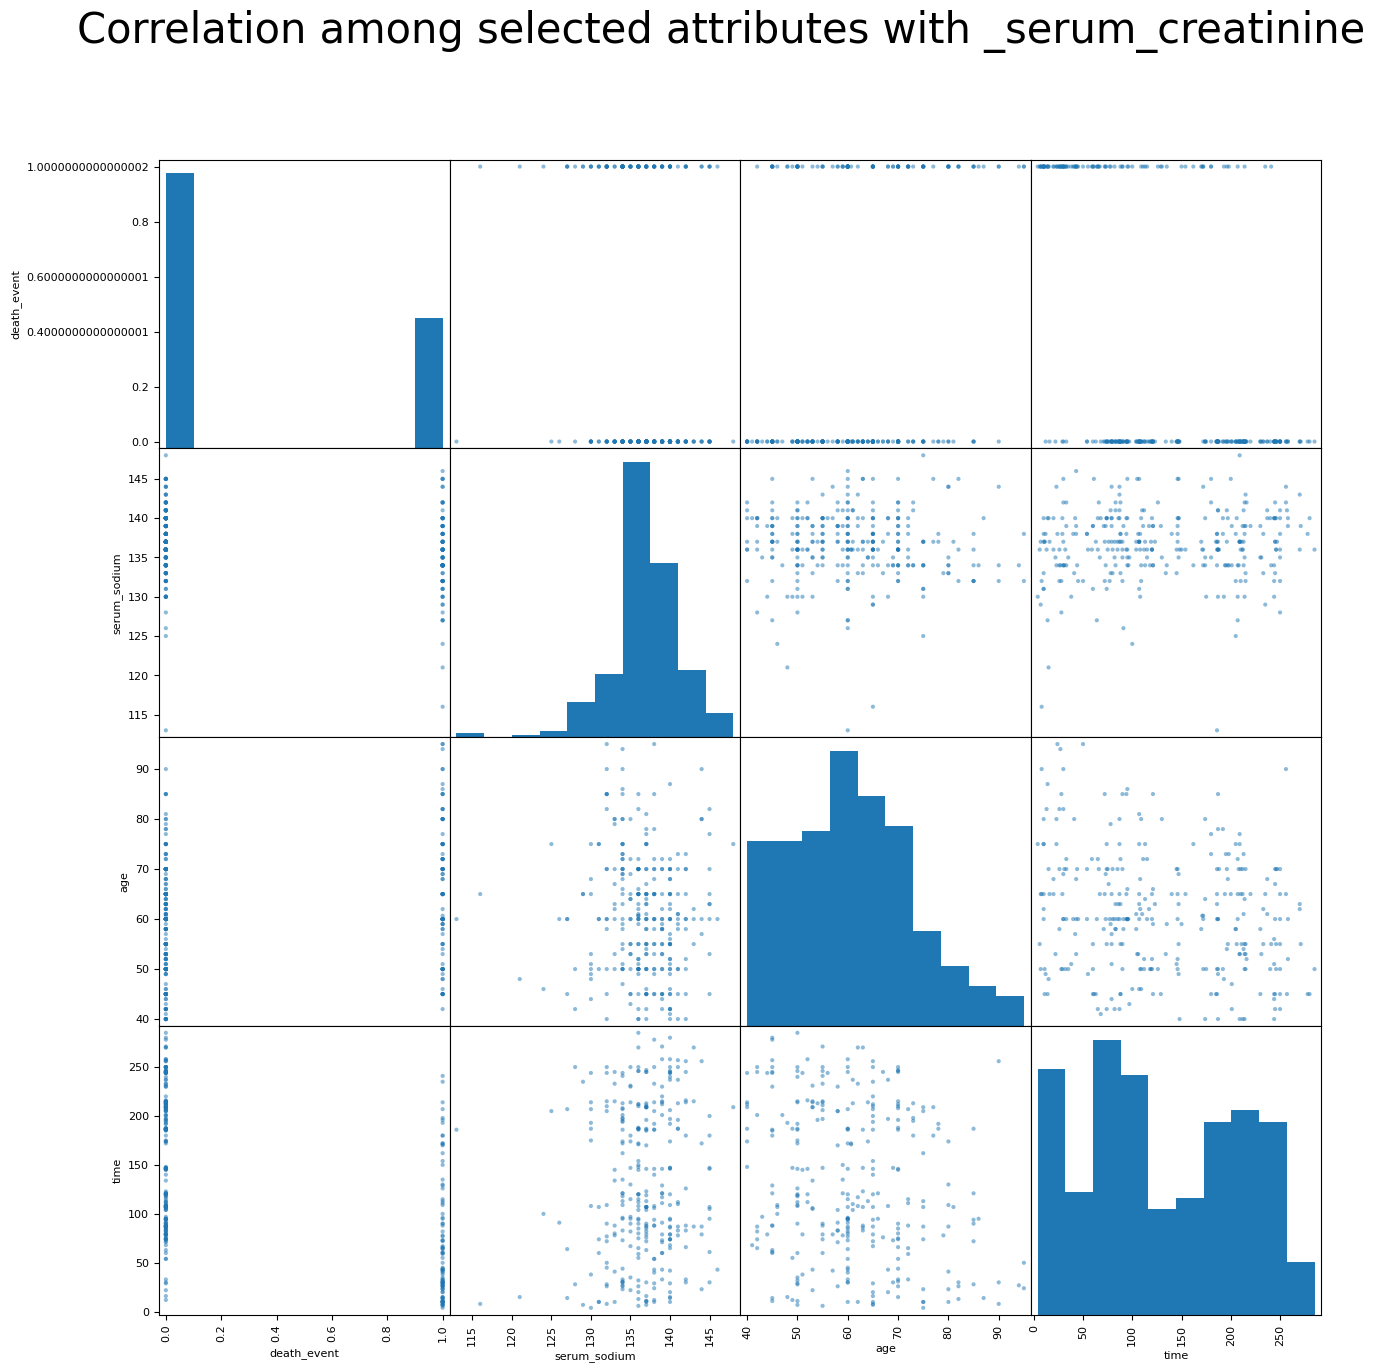

In [ ]:
# GRAPH KORELASI

import matplotlib.pyplot as plt

# Select attributes for correlation including the disease (serum creatinine)
from pandas.plotting import scatter_matrix
attributes_with_serum_creatinine = ["death_event", "serum_sodium",
                           "age", "time"]

# Plot scatter matrix for selected attributes
scatter_matrix(df[attributes_with_serum_creatinine], figsize=(15, 15))
plt.suptitle('Correlation among selected attributes with _serum_creatinine', fontsize=30)
plt.show()

# Adjust font sizes for better visualization
plt.rc('font', size=20)
plt.rc('axes', labelsize=12, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

# Display the plot
plt.show()

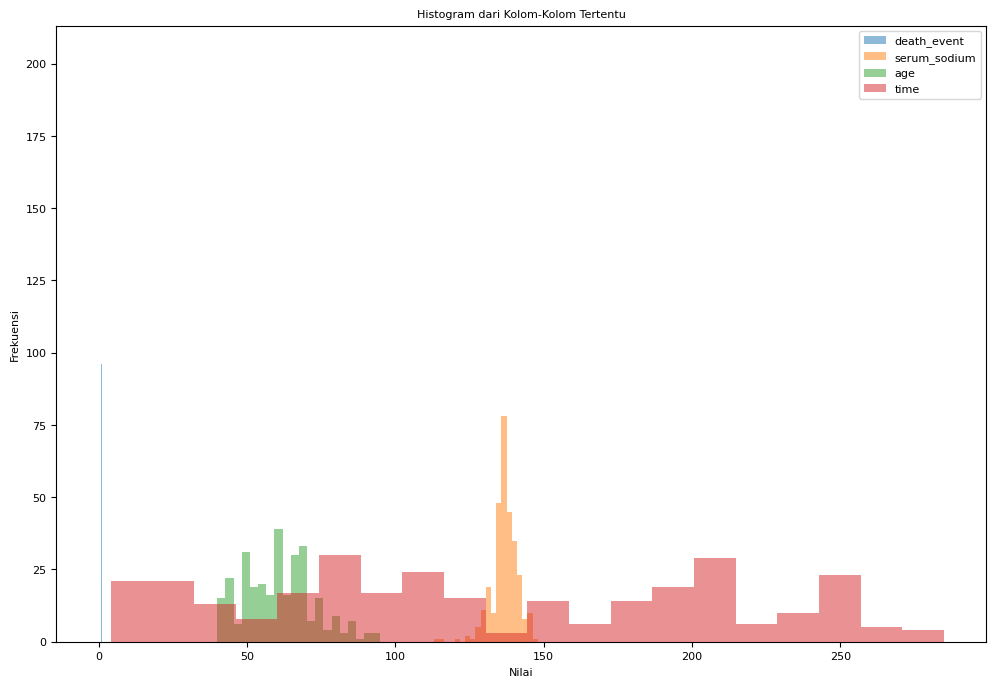

In [ ]:
# HISTOGRAM
import matplotlib.pyplot as plt

# Pengaturan ukuran teks
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

# Kolom-kolom yang akan digunakan untuk histogram
columns = ["death_event", "serum_sodium",
                           "age", "time"]

# Membuat histogram
plt.figure(figsize=(12, 8))  # Sesuaikan ukuran gambar sesuai preferensi Anda
for column in columns:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)

plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram dari Kolom-Kolom Tertentu')
plt.legend()
plt.show()



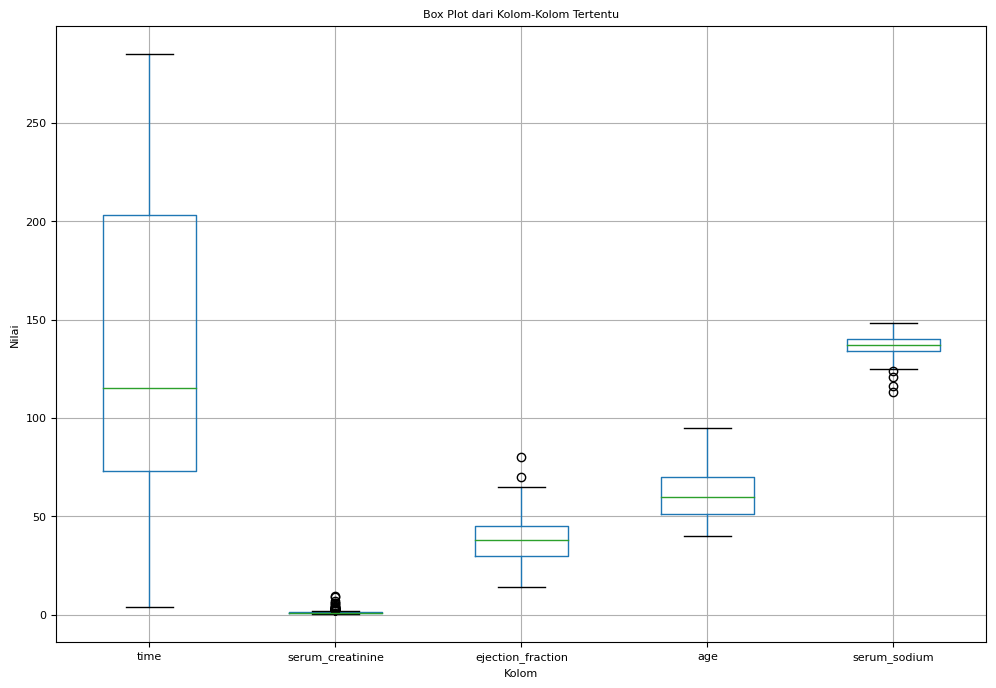

In [ ]:
# BOXPLOT
# Pengaturan ukuran teks
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

# Kolom-kolom yang akan digunakan untuk box plot
columns = ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']

# Membuat box plot
plt.figure(figsize=(12, 8))  # Sesuaikan ukuran gambar sesuai preferensi Anda
df.boxplot(column=columns)
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.title('Box Plot dari Kolom-Kolom Tertentu')
plt.show()


In [ ]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers(data_frame, column):
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_frame[(data_frame[column] >= lower_bound) & (data_frame[column] <= upper_bound)]

# Kolom-kolom yang ingin diperiksa dan bersihkan dari outlier
columns_to_check = ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']
# Menghapus outlier dari DataFrame
for column in columns_to_check:
    df = remove_outliers(df, column)

# Periksa DataFrame yang sudah bersih dari outlier
print(columns_to_check)

['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']


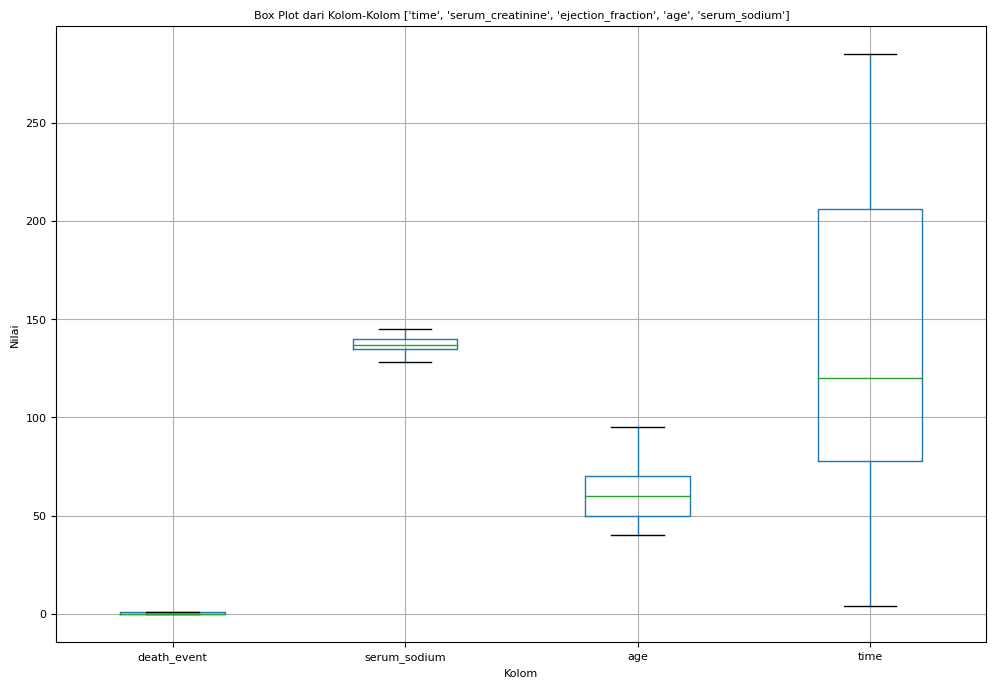

In [ ]:
# BOXPLOT SETELAH PENGHAPUSAN OUTLIER
# Pengaturan ukuran teks
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

# Kolom-kolom yang akan digunakan untuk box plot
columns = ["death_event", "serum_sodium", "age", "time"]

# Membuat box plot
plt.figure(figsize=(12, 8))
df.boxplot(column=columns)
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.title("Box Plot dari Kolom-Kolom ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']")
plt.show()

In [ ]:
selected_columns = ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'death_event']
df = df[selected_columns]

In [ ]:
df

,time,serum_creatinine,ejection_fraction,age,serum_sodium,death_event
0,4,1.9,20,75.0,130,1
1,6,1.1,38,55.0,136,1
2,7,1.3,20,65.0,129,1
3,7,1.9,20,50.0,137,1
5,8,2.1,40,90.0,132,1
...,...,...,...,...,...,...
294,270,1.1,38,62.0,143,0
295,271,1.2,38,55.0,139,0
296,278,0.8,60,45.0,138,0
297,280,1.4,38,45.0,140,0


# (3) Ringkasan Metode
Dalam analisis menggunakan Support Vector Regression (SVR) untuk memprediksi nilai 'serum_creatinine', data awal dibagi menjadi set pelatihan (X_train dan y_train), serta set validasi (X_validation dan y_validation) dan set pengujian (X_test dan y_test). Untuk memastikan kebersihan data, baris yang mengandung nilai NaN dihilangkan dari data pelatihan. Model SVR dengan kernel linear dan epsilon 0.005 kemudian dilatih menggunakan data pelatihan. Hasil prediksi diperoleh dengan menggunakan data validasi, dan evaluasi dilakukan dengan menghitung Mean Squared Error (MSE) dan R-squared (R²). Terakhir, prediksi model dibandingkan dengan nilai aktual dari data validasi. Langkah-langkah ini memberikan gambaran menyeluruh tentang proses pemodelan dan evaluasi menggunakan SVR untuk memprediksi 'serum_creatinine'.

Selain SVR, ktia juga menggunakan ANN, ANN dipilih karena kemampuannya dalam menangani struktur data kompleks dan mengekstraksi pola yang mendalam. Model neural network dapat mengatasi masalah non-linearitas dan interaksi antar fitur dengan cara yang lebih adaptif. Dalam konteks kesehatan, ANN telah terbukti berhasil dalam memodelkan hubungan yang kompleks antara variabel-variabel klinis.






In [ ]:
df

,time,serum_creatinine,ejection_fraction,age,serum_sodium,death_event
0,4,1.9,20,75.0,130,1
1,6,1.1,38,55.0,136,1
2,7,1.3,20,65.0,129,1
3,7,1.9,20,50.0,137,1
5,8,2.1,40,90.0,132,1
...,...,...,...,...,...,...
294,270,1.1,38,62.0,143,0
295,271,1.2,38,55.0,139,0
296,278,0.8,60,45.0,138,0
297,280,1.4,38,45.0,140,0


In [ ]:
# Baseline Model

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['serum_creatinine']), df['serum_creatinine'], test_size=0.2, random_state=42, shuffle=True)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5,random_state=42, shuffle=True)

In [ ]:
import numpy as np

X_train = np.concatenate((X_train, X_train))
y_train = np.concatenate((y_train, y_train))

In [ ]:
import numpy as np

# Menyaring baris yang tidak mengandung NaN dari X_train dan y_train
not_nan_indices = ~np.isnan(y_train)
X_train = X_train[not_nan_indices]
y_train = y_train[not_nan_indices]

y_train

array([1.  , 1.  , 1.6 , 1.  , 1.1 , 1.7 , 1.  , 1.  , 1.6 , 1.  , 0.7 ,
       1.  , 1.1 , 1.83, 1.7 , 1.7 , 1.3 , 0.75, 1.3 , 1.3 , 1.  , 0.9 ,
       1.1 , 1.18, 0.9 , 0.8 , 0.8 , 1.3 , 0.9 , 0.9 , 1.  , 0.8 , 1.2 ,
       0.9 , 1.1 , 1.  , 1.2 , 0.8 , 1.2 , 1.2 , 1.2 , 1.3 , 1.1 , 0.9 ,
       0.7 , 1.8 , 0.9 , 1.  , 0.7 , 1.  , 1.2 , 1.3 , 1.9 , 1.  , 2.  ,
       0.9 , 1.3 , 0.9 , 1.3 , 1.4 , 1.6 , 0.8 , 1.7 , 1.2 , 2.1 , 1.1 ,
       1.  , 0.7 , 1.4 , 0.7 , 1.  , 1.4 , 1.  , 1.3 , 2.1 , 1.2 , 0.9 ,
       0.8 , 1.9 , 1.1 , 1.  , 1.  , 1.3 , 1.83, 0.9 , 0.6 , 1.  , 1.  ,
       1.  , 0.8 , 1.8 , 1.  , 1.  , 2.1 , 1.  , 1.2 , 1.18, 1.2 , 1.1 ,
       0.9 , 0.8 , 0.8 , 1.1 , 1.1 , 0.7 , 1.7 , 1.18, 1.1 , 0.8 , 1.2 ,
       1.4 , 1.83, 0.9 , 1.2 , 0.9 , 1.3 , 1.1 , 1.  , 1.7 , 1.1 , 1.3 ,
       1.1 , 0.9 , 0.6 , 1.1 , 0.8 , 1.9 , 0.7 , 0.8 , 1.1 , 1.1 , 1.18,
       0.8 , 1.3 , 1.5 , 1.2 , 1.1 , 1.2 , 1.5 , 0.7 , 0.8 , 1.18, 1.2 ,
       1.18, 1.2 , 0.7 , 1.1 , 0.9 , 0.9 , 0.8 , 1.

### CHEATSHEETS
* C: Parameter penalti. Ini mengontrol trade-off antara kesalahan model dan margin maksimum. Nilai C yang lebih tinggi akan cenderung membuat model lebih ketat terhadap data pelatihan.

* epsilon: Nilai epsilon dalam fungsi kerugian epsilon-insensitive. Ini mengontrol toleransi terhadap kesalahan. Nilai epsilon ini mengontrol seberapa besar kesalahan yang dapat diterima sebelum dianggap sebagai pelanggaran.

* degree: Hanya berlaku untuk kernel 'poly'. Ini mengatur derajat polynomial yang digunakan dalam kernel polynomial.

* gamma: Parameter kernel yang mempengaruhi bentuk fungsi kernel RBF ('rbf'). Nilai yang lebih tinggi akan menghasilkan lebih banyak fleksibilitas dalam penyesuaian, tetapi juga dapat menyebabkan overfitting.

* coef0: Parameter yang mempengaruhi koefisien bebas dalam fungsi kernel ('poly' atau 'sigmoid'). Ini memungkinkan Anda untuk mengontrol karakteristik kernel dengan lebih baik.

* shrinking: Ini mengontrol apakah mekanisme pengerutan (shrinking) harus diaktifkan. Mekanisme pengerutan dapat mengurangi waktu pelatihan tetapi tidak selalu diperlukan.

* tol: Toleransi untuk menghentikan kriteria berhenti dalam proses pelatihan.

* max_iter: Jumlah iterasi maksimum yang digunakan untuk pelatihan. Ini dapat digunakan untuk mengendalikan batas waktu pelatihan.



# (4) PEMBUATAN MODEL BASELINE UNTUK SVM

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', epsilon=0.005)

svr.fit(X_train, y_train)
prediction = svr.predict(X_validation)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_validation, prediction)
r2 = r2_score(y_validation, prediction)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.07079373663201007
R-squared: 0.3520962805378177


In [ ]:
# Membandingkan nilai asli dengan prediksinya
print("prediction:", prediction)
print(" ")
print("actual data:", list(y_validation))

prediction: [1.15349727 1.28295768 1.06726471 1.08146273 0.99062998 0.98471593
 1.03717847 0.94712369 1.00694503 0.93320193 1.06257348 1.05581921
 1.00118734 0.8700666  1.05914968 1.39638246 1.29523045 1.09423105
 1.00818402 1.28140861 0.98490405 1.21887734 0.99634899 1.18344463
 1.00587527 0.96836415]
 
actual data: [1.18, 1.83, 1.1, 1.0, 0.9, 0.9, 1.3, 0.8, 1.5, 0.7, 1.0, 1.0, 0.9, 1.2, 1.1, 1.83, 1.83, 0.9, 1.0, 1.3, 0.8, 1.0, 0.8, 0.6, 1.0, 0.8]


In [ ]:
import joblib
# Menyimpan model ke file
joblib.dump(svr, 'modelSVM1.pkl')


['modelSVM1.pkl']

In [ ]:
print(len(prediction))

26


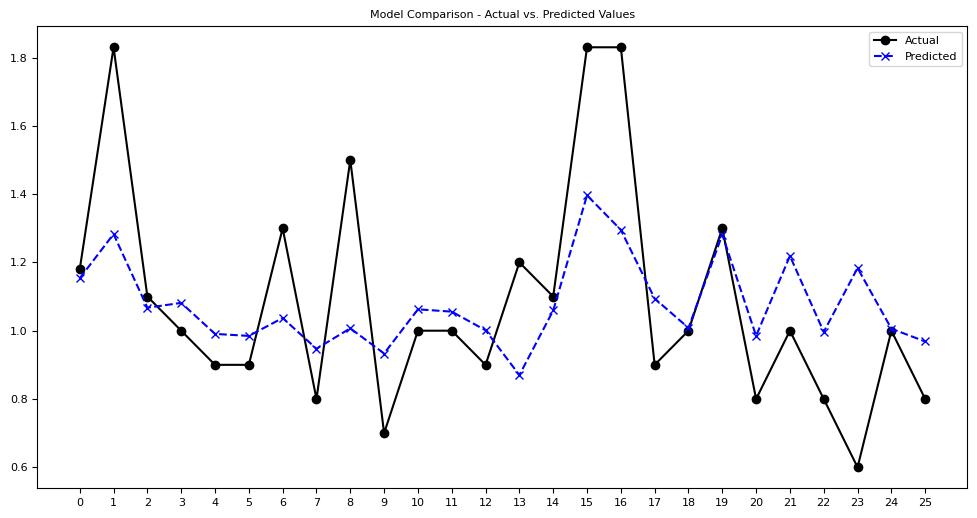

In [ ]:
# GRAFIK nilai asli dengan predikisinya
import numpy as np
import matplotlib.pyplot as plt
plt.title("Model utama (1) - Grafik perbandingan nilai asli (y_validation) dengan nilai prediksinya")

# Plot actual data and predicted data
x_axis = np.arange(len(y_validation))

plt.title("Model Comparison - Actual vs. Predicted Values")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, prediction, label='Predicted', color='b', linestyle='--', marker='x')

# Set label x
plt.xticks(x_axis)

plt.legend()

plt.show()




# (5) MODEL EXPLORATION USING SVM

### EXPLORATION METHOD 1
* menggunakan kernel = 'linear' dengan semua parameter pada SVR adalah default
* menggunakan y_validation sebagai data testing

In [ ]:
# Model Exploration (at least 3 scheme)
# Write your code here

# METHOD 1
# Menggunakan Kernel
from sklearn.svm import SVR
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)
predictionLinear = svr.predict(X_validation)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_validation, predictionLinear)
r2 = r2_score(y_validation, predictionLinear)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.07171644666295487
R-squared: 0.3436516456099884


In [ ]:
import joblib
# Menyimpan model ke file
joblib.dump(svr, 'modelSVM2.pkl')


['modelSVM2.pkl']

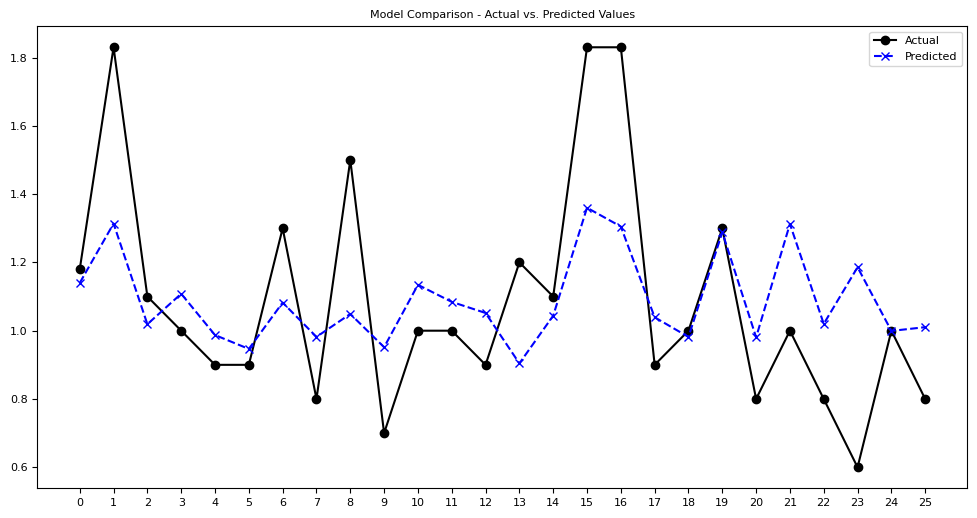

In [ ]:
# GRAFIK nilai asli dengan predikisinya
import numpy as np
import matplotlib.pyplot as plt
plt.title("Model utama (1) - Grafik perbandingan nilai asli (y_validation) dengan nilai prediksinya (MENGGUNAKAN KERNEL LINIER, PARAMETER YG LAIN DEFAULT)")

# Plot actual data and predicted data
x_axis = np.arange(len(y_validation))

plt.title("Model Comparison - Actual vs. Predicted Values")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, predictionLinear, label='Predicted', color='b', linestyle='--', marker='x')

# Set label x
plt.xticks(x_axis)

plt.legend()

plt.show()

### EXPLORATION METHOD 2
* menggunakan kernel = 'rbf' yg memang cocok untuk data yg persebaran datanya tidak bisa ditarik oleh garis linier dengan semua parameter pada SVR adalah default kecuali epsilon=0.1 (epsilon kurang dari 1 dengan tujuan agar model memiliki toleransi kesalahan yang rendah dengan harapan memperoleh akurasi tinggi setidaknya untuk validation set ini)
* menggunakan y_validation sebagai data testing

In [ ]:
# METHOD 2
from sklearn.svm import SVR
svr = SVR(kernel='rbf', epsilon=0.1)

svr.fit(X_train, y_train)
prediction2 = svr.predict(X_validation)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_validation, prediction2)
r2 = r2_score(y_validation, prediction2)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0796462558103302
R-squared: 0.27107809481811485


In [ ]:
import joblib
# Menyimpan model ke file
joblib.dump(svr, 'modelSVM3.pkl')


['modelSVM3.pkl']

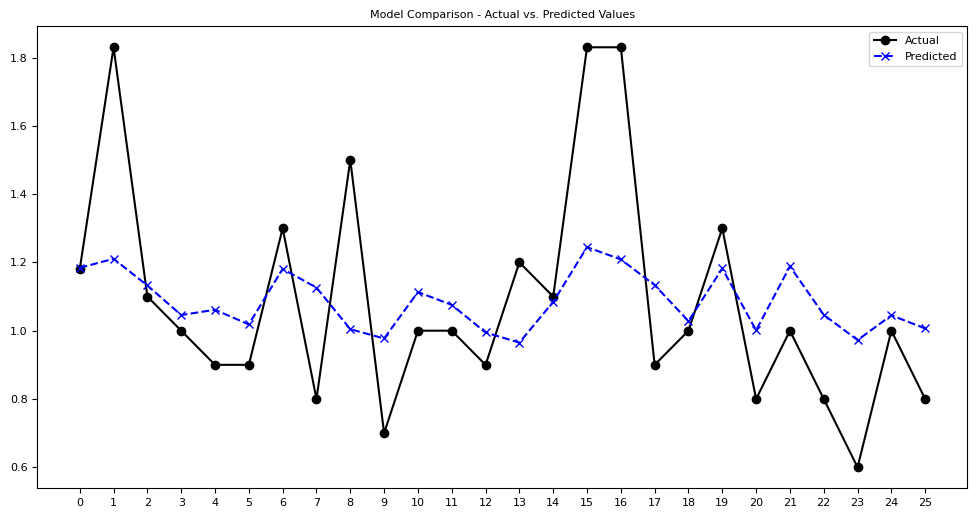

In [ ]:
# GRAFIK nilai asli dengan predikisinya
import numpy as np
import matplotlib.pyplot as plt
plt.title("Model utama (1) - Grafik perbandingan nilai asli (y_validation) dengan nilai prediksinya (MENGGUNAKAN KERNEL LINIER, PARAMETER YG LAIN DEFAULT)")

# Plot actual data and predicted data
x_axis = np.arange(len(y_validation))

plt.title("Model Comparison - Actual vs. Predicted Values")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, prediction2, label='Predicted', color='b', linestyle='--', marker='x')

# Set label x
plt.xticks(x_axis)

plt.legend()

plt.show()

### EXPLORATION METHOD 3
* menggunakan kernel = 'linear' yg cocok untuk data dengan persebaran yang dapat ditarik garis linier
* nilai C adalah 1 = akan menciptakan batas keputusan yang lebih sederhana dengan margin yang lebih besar, yang dapat meningkatkan toleransi terhadap data yang mungkin berada di sisi yang salah dari batas keputusan
* nilai epsilon = 0.00001: Nilai epsilon yang lebih kecil akan menghasilkan margin yang lebih ketat dan model yang lebih sensitif terhadap perbedaan kecil dalam prediksi.

In [ ]:
# METHOD 3
from sklearn.svm import SVR
svr = SVR(kernel='linear',C=1,epsilon=0.00001)

svr.fit(X_train, y_train)
prediction3 = svr.predict(X_validation)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_validation, prediction3)
r2 = r2_score(y_validation, prediction3)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.06984084110260444
R-squared: 0.36081717290955373


In [ ]:
import joblib
# Menyimpan model ke file
joblib.dump(svr, 'modelSVM4.pkl')


['modelSVM4.pkl']

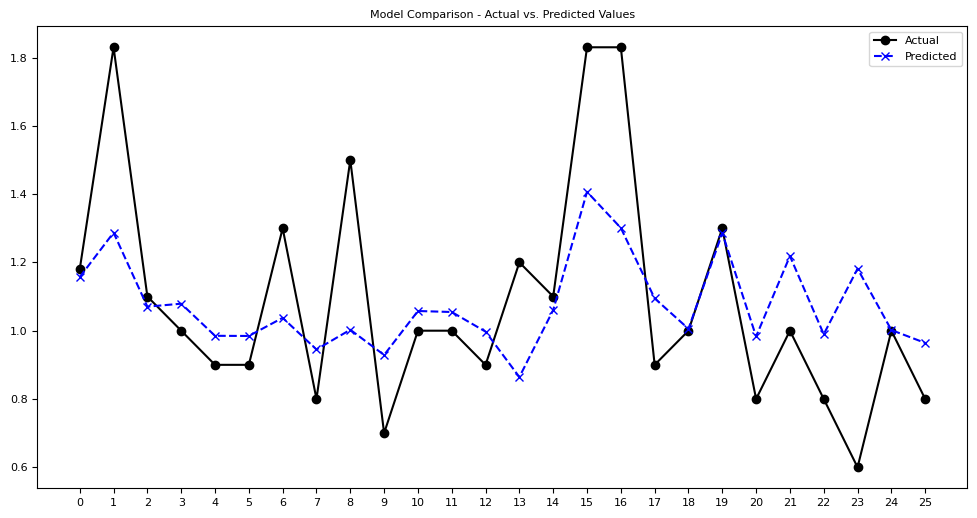

In [ ]:
# GRAFIK nilai asli dengan predikisinya
import numpy as np
import matplotlib.pyplot as plt
plt.title("Model utama (1) - Grafik perbandingan nilai asli (y_validation) dengan nilai prediksinya (MENGGUNAKAN KERNEL LINIER, PARAMETER YG LAIN DEFAULT)")

# Plot actual data and predicted data
x_axis = np.arange(len(y_validation))

plt.title("Model Comparison - Actual vs. Predicted Values")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, prediction3, label='Predicted', color='b', linestyle='--', marker='x')

# Set label x
plt.xticks(x_axis)

plt.legend()

plt.show()

### EXPLORATION METHOD 4
* menggunakan kernel = 'poly' Kernel polinomial digunakan untuk memetakan data ke dalam ruang fitur berdimensi tinggi menggunakan fungsi polinomial.

* nilai epsilon = 0.375 : Nilai epsilon yang lebih kecil akan menghasilkan margin yang lebih ketat dan model yang lebih sensitif terhadap perbedaan kecil dalam prediksi.
* parameter degree =1: Parameter degree mengontrol derajat polinomial yang akan digunakan. Ini menentukan sejauh mana data akan diangkat ke dalam ruang fitur berdimensi tinggi.

In [ ]:
# METHOD 4
from sklearn.svm import SVR
svr = SVR(kernel='poly', epsilon=0.375, degree=1)

svr.fit(X_train, y_train)
prediction4 = svr.predict(X_validation)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_validation, prediction4)
r2 = r2_score(y_validation, prediction4)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0799477922619954
R-squared: 0.26831843559002744


In [ ]:
import joblib
# Menyimpan model ke file
joblib.dump(svr, 'modelSVM5.pkl')


['modelSVM5.pkl']

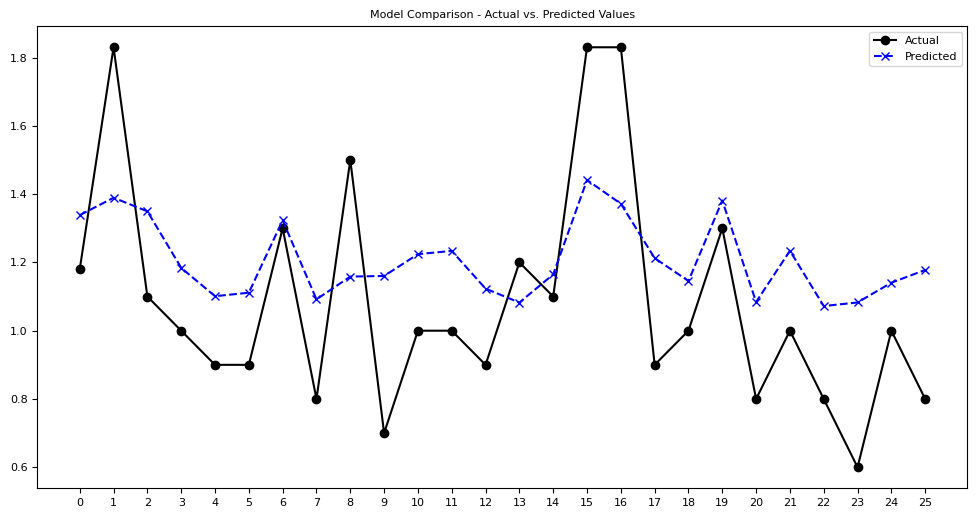

In [ ]:
# GRAFIK nilai asli dengan predikisinya
import numpy as np
import matplotlib.pyplot as plt
plt.title("Model utama (1) - Grafik perbandingan nilai asli (y_validation) dengan nilai prediksinya (MENGGUNAKAN KERNEL LINIER, PARAMETER YG LAIN DEFAULT)")

# Plot actual data and predicted data
x_axis = np.arange(len(y_validation))

plt.title("Model Comparison - Actual vs. Predicted Values")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, prediction4, label='Predicted', color='b', linestyle='--', marker='x')

# Set label x
plt.xticks(x_axis)

plt.legend()

plt.show()

# (5) SVM EVALUATION

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib


print("")

# Memuat model
loaded_model1 = joblib.load('modelSVM1.pkl') #base
loaded_model2 = joblib.load('modelSVM2.pkl')
loaded_model3 = joblib.load('modelSVM3.pkl')
loaded_model4 = joblib.load('modelSVM4.pkl')
loaded_model5 = joblib.load('modelSVM5.pkl')


# Menggunakan model yang telah dimuat untuk prediksi pada set pengujian
evaluation_test1 = loaded_model1.predict(X_test)
evaluation_test2 = loaded_model2.predict(X_test)
evaluation_test3 = loaded_model3.predict(X_test)
evaluation_test4 = loaded_model4.predict(X_test)
evaluation_test5 = loaded_model5.predict(X_test)


# Menghitung MSE dan R-squared pada set pengujian
mse_test1 = mean_squared_error(y_test, evaluation_test1)
r2_test1 = r2_score(y_test, evaluation_test1)

mse_test2 = mean_squared_error(y_test, evaluation_test2)
r2_test2 = r2_score(y_test, evaluation_test2)

mse_test3 = mean_squared_error(y_test, evaluation_test3)
r2_test3 = r2_score(y_test, evaluation_test3)

mse_test4 = mean_squared_error(y_test, evaluation_test4)
r2_test4 = r2_score(y_test, evaluation_test4)

mse_test5 = mean_squared_error(y_test, evaluation_test5)
r2_test5 = r2_score(y_test, evaluation_test5)



# Menampilkan hasil evaluasi pada set pengujian
print(f"Mean Squared Error (Test) MODEL 1: {mse_test1}")
print(f"R-squared (Test) MODEL 1: {r2_test1}")
print(" ")

print(f"Mean Squared Error (Test) MODEL 2: {mse_test2}")
print(f"R-squared (Test) MODEL 2: {r2_test2}")
print(" ")

print(f"Mean Squared Error (Test) MODEL 3: {mse_test3}")
print(f"R-squared (Test) MODEL 3: {r2_test3}")
print(" ")

print(f"Mean Squared Error (Test) MODEL 4: {mse_test4}")
print(f"R-squared (Test) MODEL 4: {r2_test4}")
print(" ")

print(f"Mean Squared Error (Test) MODEL 5: {mse_test5}")
print(f"R-squared (Test) MODEL 5: {r2_test5}")
print(" ")



Mean Squared Error (Test) MODEL 1: 0.07597777693876982
R-squared (Test) MODEL 1: 0.1931904346025195
 
Mean Squared Error (Test) MODEL 2: 0.08696108057594533
R-squared (Test) MODEL 2: 0.07655850891088567
 
Mean Squared Error (Test) MODEL 3: 0.09002198003809861
R-squared (Test) MODEL 3: 0.04405475499379641
 
Mean Squared Error (Test) MODEL 4: 0.07595892382927476
R-squared (Test) MODEL 4: 0.1933906361573815
 
Mean Squared Error (Test) MODEL 5: 0.09046705899692373
R-squared (Test) MODEL 5: 0.039328452437897066
 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


#### DAFTAR
* prediction
* predictionLinear
* prediction2
* prediction3
* prediction4

* evaluation_test1
* evaluation_test2
* evaluation_test3
* evaluation_test4
* evaluation_test5

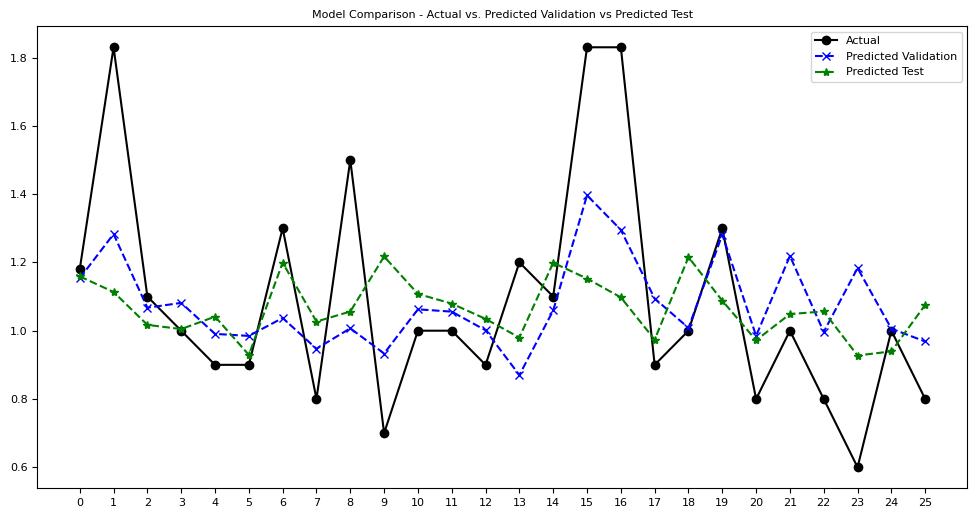

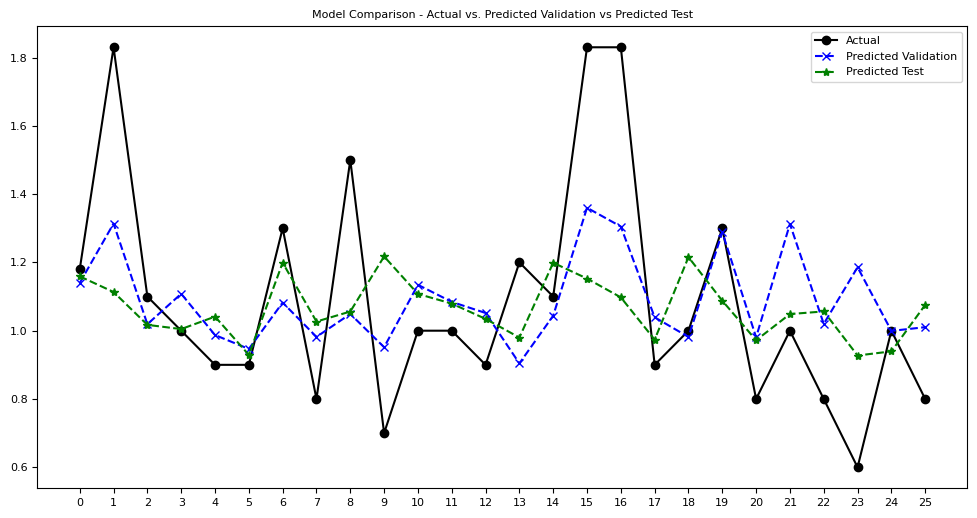

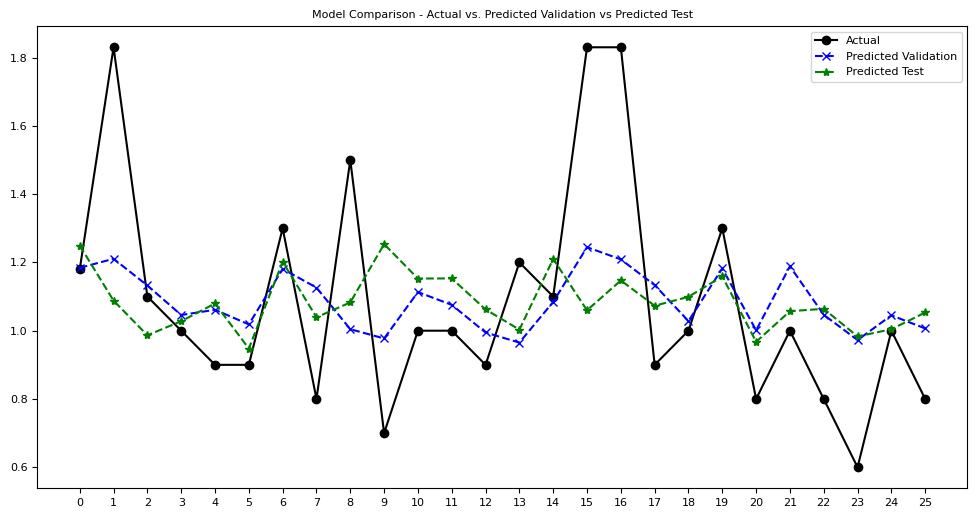

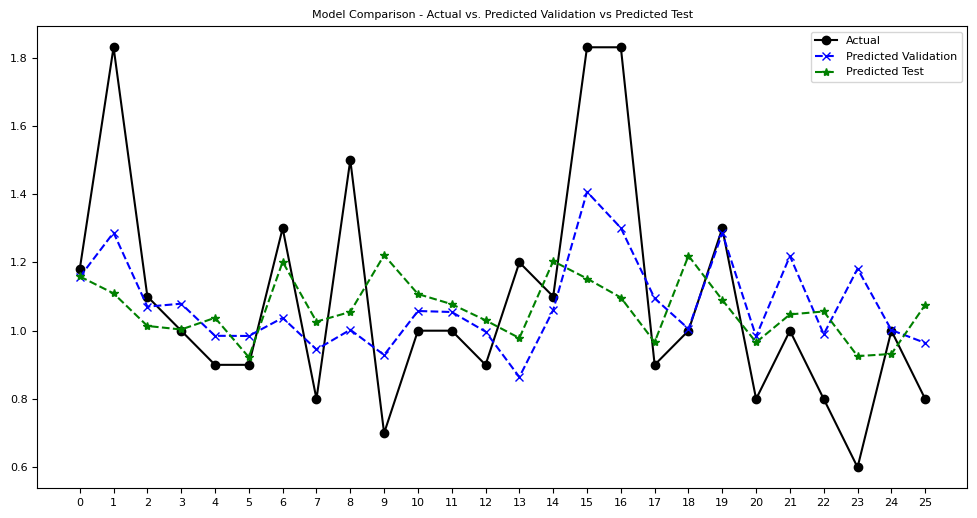

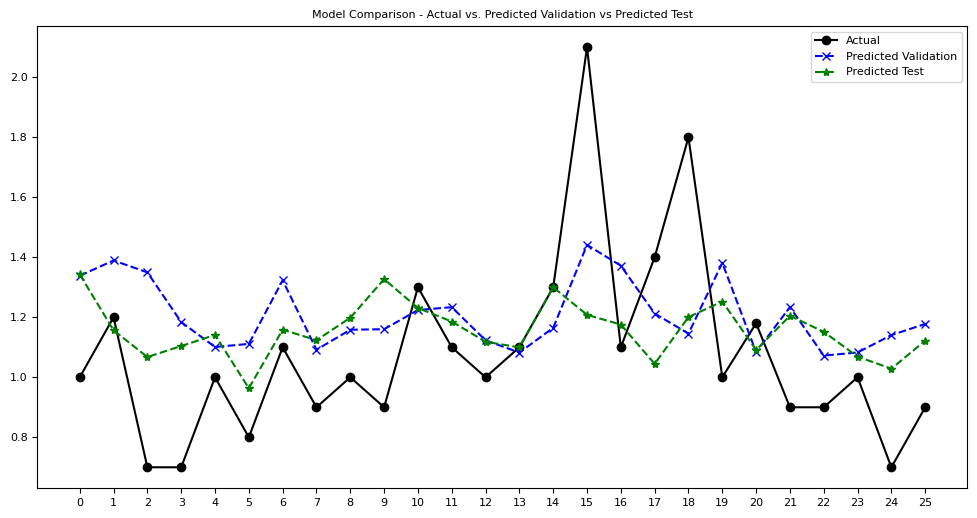

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# PERBANDINGAN MODEL 1
# Pastikan panjangnya sama
min_length = min(len(y_validation), len(prediction), len(evaluation_test1))
y_validation = y_validation[:min_length]
prediction_validation1 = prediction[:min_length]
prediction_test1 = evaluation_test1[:min_length]
# Plot actual data and predicted data
x_axis = np.arange(min_length)
plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, prediction_validation1, label='Predicted Validation', color='b', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test1, label='Predicted Test', color='g', linestyle='--', marker='*')
# Set label x
plt.xticks(x_axis)
plt.legend()
plt.show()

# PERBANDINGAN MODEL 2
# Pastikan panjangnya sama
min_length = min(len(y_validation), len(predictionLinear), len(evaluation_test2))
y_validation = y_validation[:min_length]
prediction_validation2 = predictionLinear[:min_length]
prediction_test2 = evaluation_test1[:min_length]
# Plot actual data and predicted data
x_axis = np.arange(min_length)
plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, prediction_validation2, label='Predicted Validation', color='b', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test2, label='Predicted Test', color='g', linestyle='--', marker='*')
# Set label x
plt.xticks(x_axis)
plt.legend()
plt.show()

# PERBANDINGAN MODEL 3
# Pastikan panjangnya sama
min_length = min(len(y_validation), len(prediction2), len(evaluation_test3))
y_validation = y_validation[:min_length]
prediction_validation3 = prediction2[:min_length]
prediction_test3 = evaluation_test3[:min_length]
# Plot actual data and predicted data
x_axis = np.arange(min_length)
plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, prediction_validation3, label='Predicted Validation', color='b', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test3, label='Predicted Test', color='g', linestyle='--', marker='*')
# Set label x
plt.xticks(x_axis)
plt.legend()
plt.show()

# PERBANDINGAN MODEL 4
# Pastikan panjangnya sama
min_length = min(len(y_validation), len(prediction3), len(evaluation_test4))
y_validation = y_validation[:min_length]
prediction_validation4 = prediction3[:min_length]
prediction_test4 = evaluation_test4[:min_length]
# Plot actual data and predicted data
x_axis = np.arange(min_length)
plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, prediction_validation4, label='Predicted Validation', color='b', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test4, label='Predicted Test', color='g', linestyle='--', marker='*')
# Set label x
plt.xticks(x_axis)
plt.legend()
plt.show()

# PERBANDINGAN MODEL 5
# Pastikan panjangnya sama
min_length = min(len(y_validation), len(prediction4), len(evaluation_test5))
y_test = y_test[:min_length]
prediction_validation5 = prediction4[:min_length]
prediction_test5 = evaluation_test5[:min_length]
# Plot actual data and predicted data
x_axis = np.arange(min_length)
plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_test, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, prediction_validation5, label='Predicted Validation', color='b', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test5, label='Predicted Test', color='g', linestyle='--', marker='*')
# Set label x
plt.xticks(x_axis)
plt.legend()
plt.show()

#### Kesimpulan SVM
Terjadi perbedaan cukup drastis dalam R-Squared ketika menggunakan validation set dan test set terjadi karena perbedaan dalam

* Distribusi Data:
Perbedaan dalam distribusi antara data yang digunakan untuk pelatihan dan validasi atau pengujian. Jika distribusi antara keduanya berbeda secara signifikan, model mungkin tidak dapat melakukan generalisasi dengan baik pada data yang belum pernah dilihat.

# (6) BASELINE MODEL USING ANN


### CHEATSHEET
##### Hyperparameter:
* Learning Rate:
Menentukan seberapa besar langkah model mengikuti gradien.

* Epoch:
Satu kali penyelesaian seluruh dataset selama pelatihan.

* Batch Size:
Jumlah sampel yang digunakan untuk menghitung gradien.


#### Sigmoid:

* Kapan Menggunakan:
Klasifikasi Biner: Sigmoid sering digunakan di lapisan output untuk tugas klasifikasi biner karena menghasilkan output antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas.
Ketika Output Range 0-1 Diperlukan: Misalnya, pada output layer yang menghasilkan probabilitas dalam tugas seperti deteksi spam atau identifikasi penyakit.

* Pertimbangan:
Masalah Vanishing Gradient: Sigmoid dapat menyebabkan masalah vanishing gradient pada lapisan tersembunyi, yang dapat menghambat pelatihan model dalam beberapa kasus.

##### ReLU (Rectified Linear Unit):

* Kapan Menggunakan:
Umum pada Hidden Layers: ReLU sangat populer di lapisan tersembunyi karena efisien dan dapat mengurangi masalah vanishing gradient.
Tugas Regresi: Efektif dalam tugas regresi dan banyak tugas lainnya.

* Pertimbangan:
Dead Neurons: ReLU dapat mengalami "dead neurons" yang tidak aktif (output selalu 0) dan dapat menghentikan pembelajaran pada sebagian jaringan.

#### Tanh (Hyperbolic Tangent):

* Kapan Menggunakan:
Umum pada Hidden Layers: Tanh dapat digunakan di lapisan tersembunyi untuk mengatasi masalah vanishing gradient.
Klasifikasi Biner: Jika sigmoid tidak sesuai, tanh bisa menjadi alternatif yang baik pada output layer.


#### jumlah batch
* jumlah batch = (jumlah input (jml fitur) + jml output (kita pakai 1 krn regresi)/2
* akan ada 3 batch


### ANN EXPLORATION AND EVALUATION 1
* Highest R-Squared

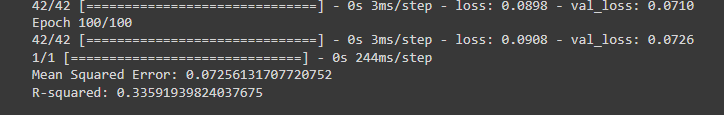

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df.drop(columns=['serum_creatinine']), df['serum_creatinine'], test_size=0.2, random_state=42, shuffle=True)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(3, activation='sigmoid'),
    keras.layers.Dense(1)  # Output layer without activation function for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_validation, y_validation))

# Predictions on validation data
prediction_validation = model.predict(X_validation)

# Evaluate the model on validation data
mse_validation = mean_squared_error(y_validation, prediction_validation)
r2_validation = r2_score(y_validation, prediction_validation)
print(f"Mean Squared Error (Validation): {mse_validation}")
print(f"R-squared (Validation): {r2_validation}")

# Save the model in Keras native format
model.save('model_ANN1', save_format='tf')

# Load the model from the file
loaded_model = keras.models.load_model('model_ANN1')

# Predictions on test data
prediction_test = loaded_model.predict(X_test)

# Evaluate the model on test data
mse_test = mean_squared_error(y_test, prediction_test)
r2_test = r2_score(y_test, prediction_test)
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")


Epoch 1/100
21/21 [==============================] - 1s 9ms/step - loss: 0.8446 - val_loss: 0.7185
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.7396 - val_loss: 0.6235
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6464 - val_loss: 0.5382
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5623 - val_loss: 0.4640
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4896 - val_loss: 0.3979
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4250 - val_loss: 0.3425
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3698 - val_loss: 0.2947
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3226 - val_loss: 0.2513
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2820 - val_loss: 0.2151
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2467 - val_loss: 0.1866
Epoch 11/

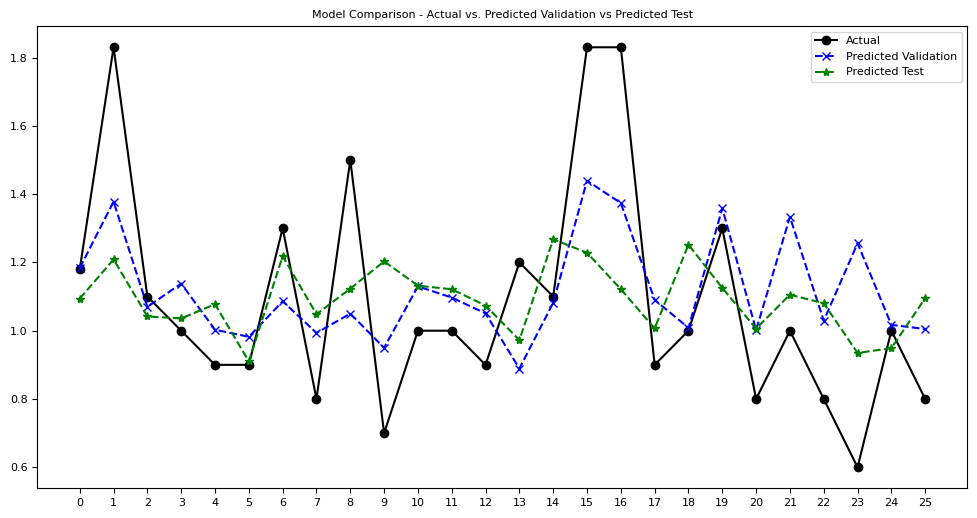

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Pastikan panjangnya sama
min_length = min(len(y_validation), len(predictionANN1), len(prediction_test))
y_validation = y_validation[:min_length]
predictionANN1 = predictionANN1[:min_length]
prediction_test = prediction_test[:min_length]

# Plot actual data and predicted data
x_axis = np.arange(min_length)

plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, predictionANN1, label='Predicted Validation', color='b', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test, label='Predicted Test', color='g', linestyle='--', marker='*')

# Set label x
plt.xticks(x_axis)

plt.legend()
plt.show()


# (7) ANN MODEL EXPLORATION

### ANN EXPLORATION AND EVALUATION 2
* highest R-Squared

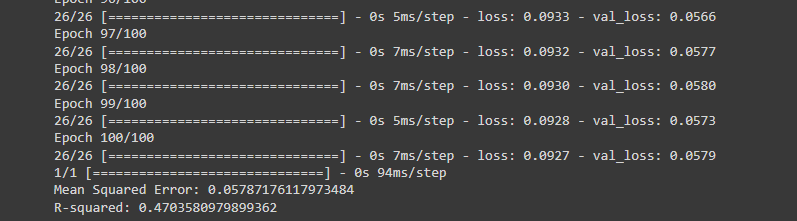

In [ ]:
# USING X_VALIDATION
# METHOD 2

# Membangun model ANN
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1)  # Output layer tanpa fungsi aktivasi untuk regresi
])

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_validation, y_validation))

# Prediksi
predictionANN2 = model.predict(X_validation)

# Evaluasi model
mse = mean_squared_error(y_validation, predictionANN2)
r2 = r2_score(y_validation, predictionANN2)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Simpan model dalam format Keras native
model.save('model_ANN2', save_format='tf')

# Memuat model dari file
loaded_model = keras.models.load_model('model_ANN2')

# Normalisasi data uji
X_test_scaled = scaler.transform(X_test)

# Prediksi dengan data uji
prediction_test = loaded_model.predict(X_test_scaled)

# Evaluasi model pada data uji
mse_test = mean_squared_error(y_test, prediction_test)
r2_test = r2_score(y_test, prediction_test)

# Cetak hasil evaluasi
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")


Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.9892 - val_loss: 1.0185
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.9291 - val_loss: 0.9357
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.8726 - val_loss: 0.8600
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8214 - val_loss: 0.7902
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.7735 - val_loss: 0.7269
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 0.7259 - val_loss: 0.6788
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6830 - val_loss: 0.6282
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6438 - val_loss: 0.5872
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6077 - val_loss: 0.5469
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5750 - val_loss: 0.5119
Epoch 11

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


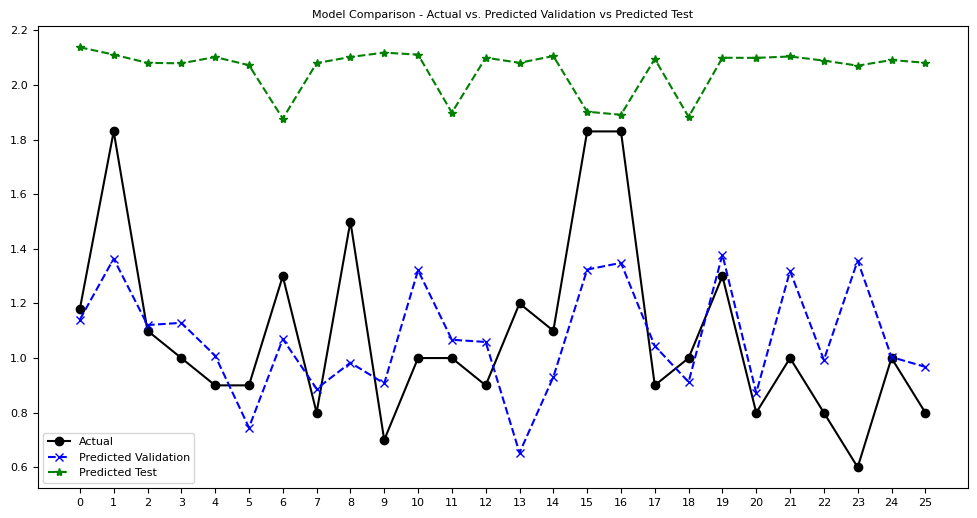

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Pastikan panjangnya sama
min_length = min(len(y_validation), len(predictionANN2), len(prediction_test))
y_validation = y_validation[:min_length]
predictionANN2 = predictionANN2[:min_length]
prediction_test = prediction_test[:min_length]

# Plot actual data and predicted data
x_axis = np.arange(min_length)

plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, predictionANN2, label='Predicted Validation', color='b', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test, label='Predicted Test', color='g', linestyle='--', marker='*')

# Set label x
plt.xticks(x_axis)

plt.legend()
plt.show()


### ANN EXPLORATION AND EVALUATION 3
* Highest R-Squared

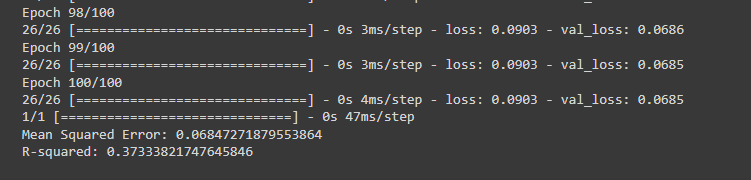

In [ ]:
# USING X_VALIDATION
# METHOD 3

# Membangun model ANN
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(3, activation='sigmoid'),
    keras.layers.Dense(1)  # Output layer tanpa fungsi aktivasi untuk regresi
])

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_validation, y_validation))

# Prediksi
predictionANN3 = model.predict(X_validation)

# Evaluasi model
mse = mean_squared_error(y_validation, predictionANN3)
r2 = r2_score(y_validation, predictionANN3)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Simpan model dalam format Keras native
model.save('model_ANN3', save_format='tf')

# Memuat model dari file
loaded_model = keras.models.load_model('model_ANN3')

# Normalisasi data uji
X_test_scaled = scaler.transform(X_test)

# Prediksi dengan data uji
prediction_test = loaded_model.predict(X_test_scaled)

# Evaluasi model pada data uji
mse_test = mean_squared_error(y_test, prediction_test)
r2_test = r2_score(y_test, prediction_test)

# Cetak hasil evaluasi
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")


Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 0.2940 - val_loss: 0.1710
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2830 - val_loss: 0.1618
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2733 - val_loss: 0.1538
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2642 - val_loss: 0.1473
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2556 - val_loss: 0.1415
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2480 - val_loss: 0.1370
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2405 - val_loss: 0.1313
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2327 - val_loss: 0.1269
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2260 - val_loss: 0.1239
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2194 - val_loss: 0.1193
Epoch 11

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


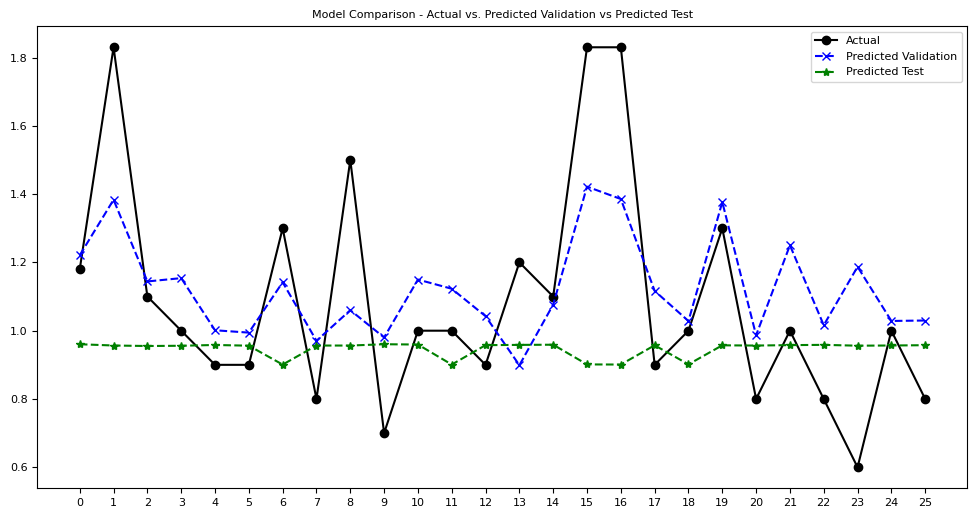

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Pastikan panjangnya sama
min_length = min(len(y_validation), len(predictionANN3), len(prediction_test))
y_validation = y_validation[:min_length]
predictionANN3 = predictionANN3[:min_length]
prediction_test = prediction_test[:min_length]

# Plot actual data and predicted data
x_axis = np.arange(min_length)

plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, predictionANN3, label='Predicted Validation', color='b', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test, label='Predicted Test', color='g', linestyle='--', marker='*')

# Set label x
plt.xticks(x_axis)

plt.legend()
plt.show()


### ANN EXPLORATION AND EVALUATION 4

In [ ]:
# USING X_TEST (DENGAN MODEL DARI EXPLORATION 2)
# METHOD 4

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Membangun model ANN
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(3, activation='sigmoid'),
    keras.layers.Dense(1)  # Output layer tanpa fungsi aktivasi untuk regresi
])

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_validation, y_validation))

# Prediksi
predictionANN4 = model.predict(X_validation)

# Evaluasi model
mse = mean_squared_error(y_validation, predictionANN3)
r2 = r2_score(y_validation, predictionANN4)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Simpan model dalam format Keras native
model.save('model_ANN4', save_format='tf')

# Memuat model dari file
loaded_model = keras.models.load_model('model_ANN4')

# Normalisasi data uji
X_test_scaled = scaler.transform(X_test)

# Prediksi dengan data uji
prediction_test = loaded_model.predict(X_test_scaled)

# Evaluasi model pada data uji
mse_test = mean_squared_error(y_test, prediction_test)
r2_test = r2_score(y_test, prediction_test)

# Cetak hasil evaluasi
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")


Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 1.6515 - val_loss: 1.1885
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 1.5598 - val_loss: 1.1116
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 1.4710 - val_loss: 1.0398
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3867 - val_loss: 0.9706
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3049 - val_loss: 0.9060
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 1.2295 - val_loss: 0.8441
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1547 - val_loss: 0.7857
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 1.0858 - val_loss: 0.7307
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0196 - val_loss: 0.6788
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9563 - val_loss: 0.6307
Epoch 11

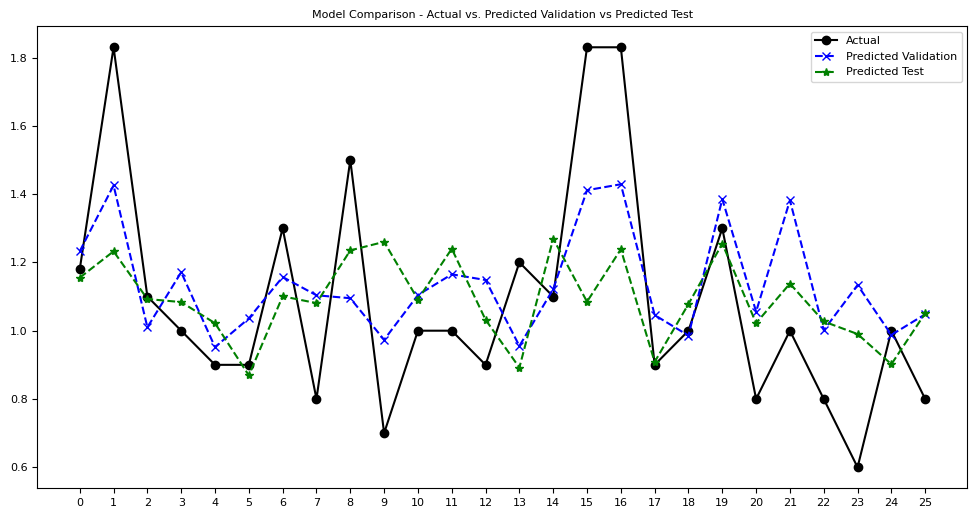

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Pastikan panjangnya sama
min_length = min(len(y_validation), len(predictionANN4), len(prediction_test))
y_validation = y_validation[:min_length]
predictionANN4 = predictionANN4[:min_length]
prediction_test = prediction_test[:min_length]

# Plot actual data and predicted data
x_axis = np.arange(min_length)

plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, predictionANN4, label='Predicted Validation', color='b', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test, label='Predicted Test', color='g', linestyle='--', marker='*')

# Set label x
plt.xticks(x_axis)

plt.legend()
plt.show()


#### Kesimpulan ANN
Terjadi perbedaan cukup drastis dalam R-Squared ketika menggunakan validation set dan test set terjadi karena perbedaan dalam

* Distribusi Data:
Perbedaan dalam distribusi antara data yang digunakan untuk pelatihan dan validasi atau pengujian. Jika distribusi antara keduanya berbeda secara signifikan, model mungkin tidak dapat melakukan generalisasi dengan baik pada data yang belum pernah dilihat.

* Overfitting pada Set Pelatihan:
Model dapat menjadi terlalu "menghafal" data pelatihan dan tidak mampu melakukan generalisasi pada data baru. Jika model terlalu kompleks atau pelatihannya terlalu lama, dapat terjadi overfitting pada set pelatihan, yang kemudian menghasilkan performa yang buruk pada data pengujian.

# (9) Kesimpulan
Training yang kami lakukan untuk melakukan prediksi pada data heart failure menggunakan model SVM dan ANN. setelah melakukan beberapa kali train dengan model dan parameter yang berbeda diperoleh hasil sebagai berikut.
1. SVR
   Pada SVR dibuat 5 model diperoleh nilai R-Squared validation sekitar 0.26 - 0.36 dan R-Squared testing kisaran 0.03 - 0.19. Rata - rata kesalahan dengan training menggunakan SVR dihitung menggunakan MSE berkisiar 0.07 - 0.06 untuk validation dan 0.07 - 0.90
2. ANN
   Training model dengan menggunakan ANN (setidaknya dalam iterasi terakhir) menghasilkan nilai R-Squared untuk validation pada kisaran 0.16 - 0.47 dan R-Squared untuk testing didapat sekitar -10.21 - 0.25. Sementara itu, rata - rata kesalahan dihitung menggunakan MSE diperoleh nilai sebesar 0.91 - 0.05 untuk validatin dan 1.05 - 0.07 untuk test.

Pada beberapa percobaan training yang telah dilakukan pada projek ini, diperoleh nilai R-Squared yang lebih baik pada validation model ANN dengan fungsi aktivasi sigmoid. Namun, umtuk konsistensi model lebih baik pada model SVR dibandingkan ANN.

Hal ini dapat disebabkan karena persebaran data yang sama sekali berbeda antara data validasi dengan data test (walaupun dalam satu dataset, plotnya dapat Anda lihat pada scatter plot di bawah). Masalah berikutnya bisa terjadi karena model ANN sudah 'terbiasa' dengan pola yg diberikan oleh data validation. ANN tidak dapat men-generalisasi jika ada data baru. Hal ini juga dapat menyebabkan ANN tidak memiliki kekonsistenan yang baik dibandingkan SVR

Masalah lain datang dari jumlah records data yang sangat sedikit. 299 untuk suatu dataset adalah jumah yang sangat kecil. Ditambah lagi, kita harus menghapus outlier sehingga makin mempersempit data.

Jumlah data yang sedikit, persebaran data yang buruk, karakteristik data yang memang digunakan untuk klasifikasi dan bukan regresi menjadikan kedua model memiliki akurasi yang tidak cukup baik untuk dikategorikan sebagai model yang baik (akurasi di atas 80 baik untuk validation / data dari luar)

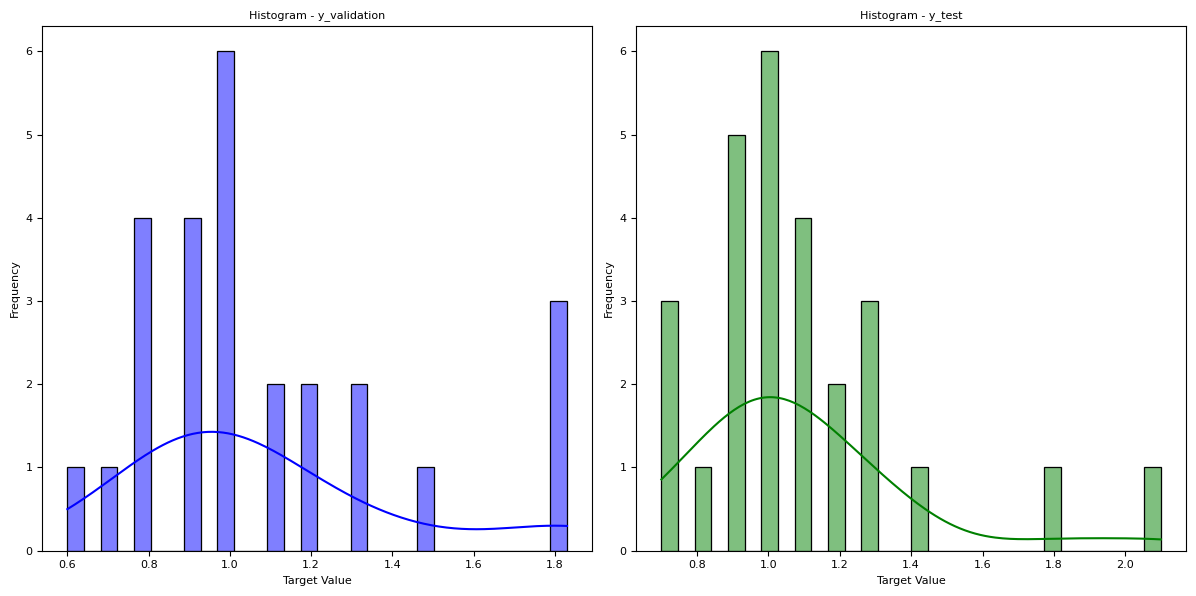

In [ ]:
# Histogram untuk y_validation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_validation, bins=30, kde=True, color='blue')
plt.title('Histogram - y_validation')
plt.xlabel('Target Value')
plt.ylabel('Frequency')

# Histogram untuk y_test
plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=30, kde=True, color='green')
plt.title('Histogram - y_test')
plt.xlabel('Target Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


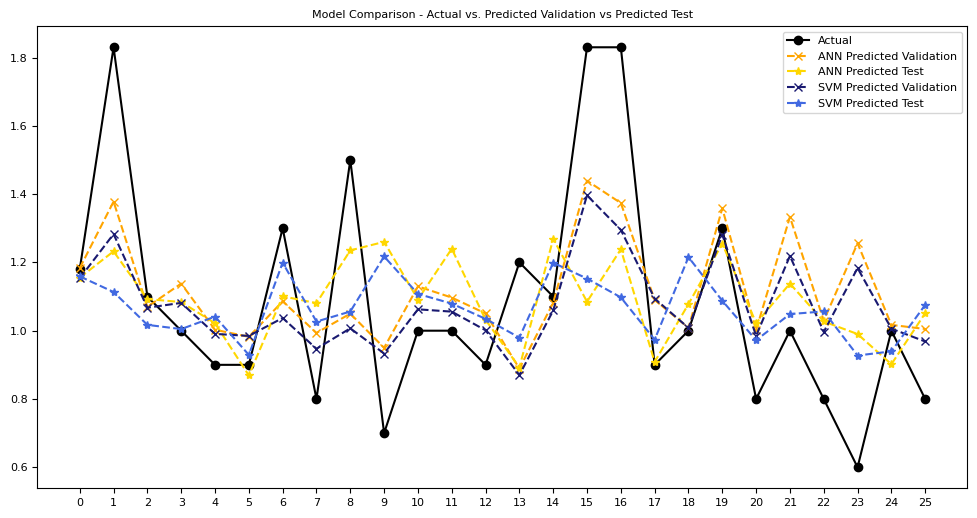

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Pastikan panjangnya sama
min_length = min(len(y_validation), len(predictionANN1), len(prediction_test))
y_validation = y_validation[:min_length]
predictionANN1 = predictionANN1[:min_length]
prediction_test = prediction_test[:min_length]

# Plot actual data and predicted data
x_axis = np.arange(min_length)

plt.title("Model Comparison - Actual vs. Predicted Validation vs Predicted Test")
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(x_axis, y_validation, label='Actual', color='k', linestyle='-', marker='o')
plt.plot(x_axis, predictionANN1, label='ANN Predicted Validation', color='orange', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test, label='ANN Predicted Test', color='gold', linestyle='--', marker='*')

plt.plot(x_axis, prediction_validation1, label='SVM Predicted Validation', color='midnightblue', linestyle='--', marker='x')
plt.plot(x_axis, prediction_test1, label='SVM Predicted Test', color='royalblue', linestyle='--', marker='*')

# Set label x
plt.xticks(x_axis)

plt.legend()
plt.show()


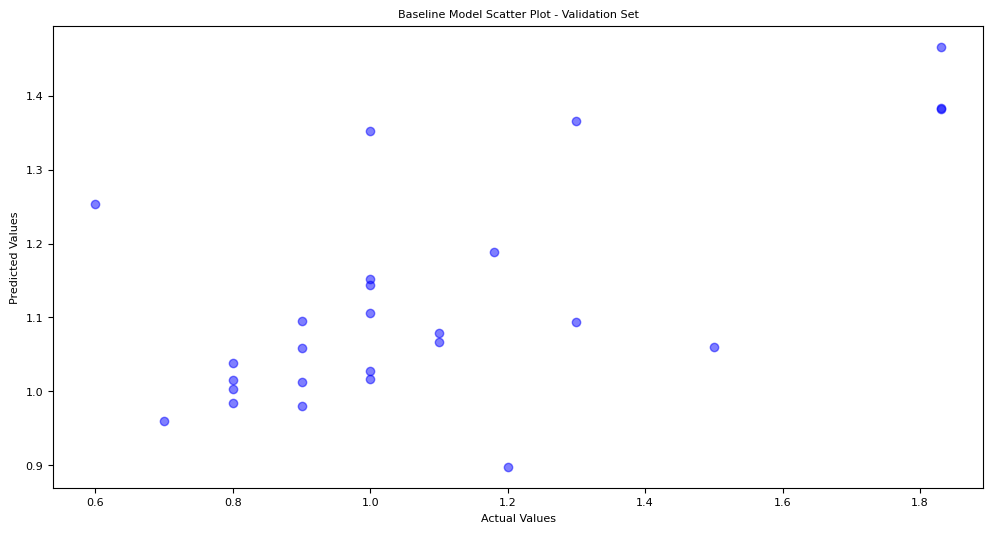

Mean Squared Error for Baseline Model (Validation): 0.0692764671837719


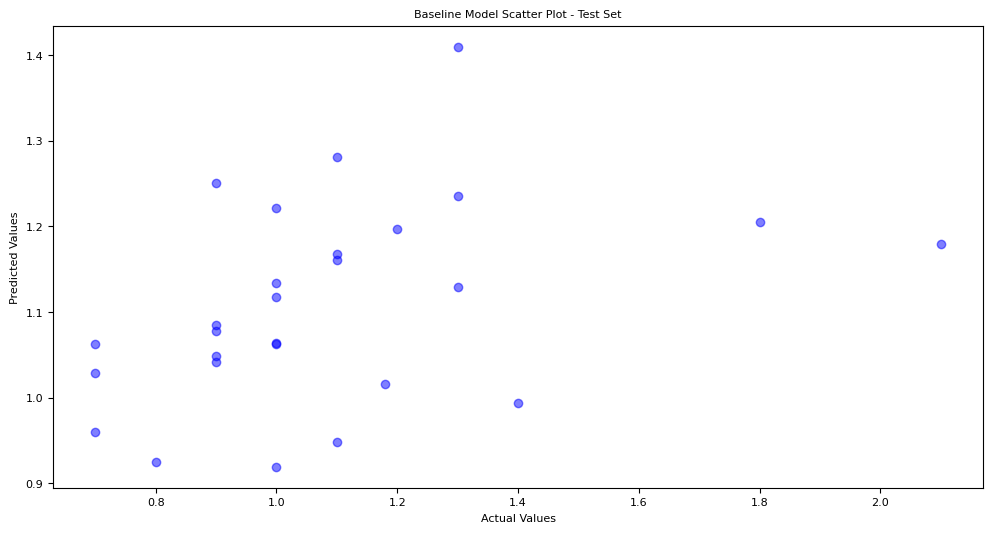

Mean Squared Error for Baseline Model (Test): 0.07972582146350682


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named 'df' with serum_creatinine and other features

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df.drop(columns=['serum_creatinine']), df['serum_creatinine'], test_size=0.2, random_state=42, shuffle=True)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Baseline model (linear regression in this case)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
baseline_predictions_val = baseline_model.predict(X_validation)

# Scatter plot for validation set
plt.scatter(y_validation, baseline_predictions_val, color='blue', alpha=0.5)
plt.title('Baseline Model Scatter Plot - Validation Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Evaluate the model on the validation set
mse_baseline_val = mean_squared_error(y_validation, baseline_predictions_val)
print(f"Mean Squared Error for Baseline Model (Validation): {mse_baseline_val}")

# Make predictions on the test set
baseline_predictions_test = baseline_model.predict(X_test)

# Scatter plot for test set
plt.scatter(y_test, baseline_predictions_test, color='blue', alpha=0.5)
plt.title('Baseline Model Scatter Plot - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Evaluate the model on the test set
mse_baseline_test = mean_squared_error(y_test, baseline_predictions_test)
print(f"Mean Squared Error for Baseline Model (Test): {mse_baseline_test}")
